# Решение краевыx задач методом разностных аппроксимаций
## Задача
$$
\begin{cases}  
u(x)y''+ p(x)y=-1,     &x\in[a,b],
\\
y(a) = A,
\\
y(b) = B,
\end{cases}  
$$

### Разбиение
Разобъем отрезок $[a,b]$ на $n$ одинаковых частей с шагом $h={b-a\over n}$ точками $a=x_{0}<x_{1}<x_{2}<...<x_{n}=b$, где  $x_{i}=a+ih$ и $y_{i}=y(x_{i})$

![error](./math_lab2_1.jpg)

###  Первая производная
| |Левая|Средняя|Правая
|-|-|-|-
|$y_{k}'$|$${y_{k}-y_{k-1}}\over h$$|$${y_{k+1}-y_{k-1}}\over 2h$$|$${y_{k+1}-y_{k}}\over h$$

###  Вторая производная
$$
y_{k}''
=({y_{k}'}_\text{(левая)})'
=({{y_{k}-y_{k-1}}\over h})'
={{{y_{k}'}_\text{(правая)}-{y_{k-1}'}_\text{(правая)}}\over h}
=\\
={{{{y_{k+1}-y_{k}}\over h}-{{y_{k}-y_{k-1}}\over h}}\over h}
={(y_{k+1}-y_{k}) - (y_{k}-y_{k-1})\over h^2}
={y_{k+1}-2y_{k}+y_{k-1}\over h^2}$$

### Система
$$
\begin{cases}  
u(x)y''+ p(x)y=-1,     &x\in[a,b],
\\
y(a) = A,
\\
y(b) = B,
\end{cases}  
=>
\begin{cases}  
y_{0} = A,
\\
y_{0}u(x_{1})+(h^2p(x_{1})-2u(x_{1}))y_{1}+y_{2}u(x_{1}) =-h^2,
\\
y_{1}u(x_{2})+(h^2p(x_{2})-2u(x_{2}))y_{2}+y_{3}u(x_{2}) =-h^2,
\\
...
\\
y_{n-2}u(x_{n-1})+(h^2p(x_{n-1})-2u(x_{n-1}))y_{n-1}+y_{n}u(x_{n-1}) =-h^2,
\\
y_{n} = B
\end{cases}  
$$



In [2]:
import sympy
import numpy
import math
import matplotlib.pyplot as pyplot

In [11]:
a = -1
b = 1
A = 0
B = 0
x, h = sympy.symbols('x h')
u = sympy.lambdify(x, sympy.sin(2))
p = sympy.lambdify(x, 1 + sympy.cos(2) * x**2)
# u = sympy.lambdify(x, 1)
# p = sympy.lambdify(x, 1 + x**2)

In [4]:
def get_h(n):
    return (b-a)/n

In [5]:
def get_array_of_x(n):
    return numpy.linspace(a, b, n + 1)

In [6]:
def get_main_matrix(x, n):
    h = get_h(n)
    matrix = numpy.zeros(shape=(n+1, n+1))
    matrix[0][0] = 1
    for i in range(1, n):
        matrix[i][i] = h**2 * p(x[i]) - 2 * u(x[i])
        matrix[i][i-1] = u(x[i])
        matrix[i][i+1] = u(x[i])
    matrix[n][n] = 1
    return matrix

In [7]:
def get_vector(x, n):
    h = get_h(n)
    vector = [-h**2]*(n+1)
    vector[0] = A
    vector[n] = B
    return vector

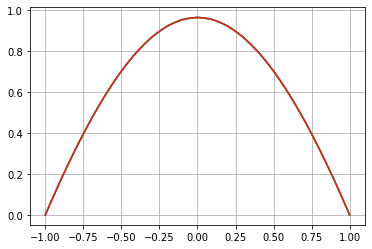

0.9645128144664943


In [12]:
n = 10
eps = 1e-3
max_diff = eps+1
# while max_diff > eps:
while n < 100:
    x1 = get_array_of_x(n)
    y1 = numpy.linalg.solve(get_main_matrix(x1, n), get_vector(x1, n))
    n *= 2
    x2 = get_array_of_x(n)
    y2 = numpy.linalg.solve(get_main_matrix(x2, n), get_vector(x2, n))
    max_diff = max(abs(y2[i*2] - y1[i]) for i in range(int(n/2)))
    pyplot.plot(x2, y2)
pyplot.grid()
pyplot.show()
print(y2[int(n/2)])